# Algorithms 4 week 2: The traveling salesman problem
https://www.coursera.org/learn/algorithms-npcomplete/exam/xF6pp/programming-assignment-2/attempt

In [253]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import files
    uploaded = files.upload()
    data = uploaded['tsp.txt'].decode('ascii')
else:
    uploaded_edges = open('./tsp.txt', 'r')
    data = uploaded_edges.read()

In [188]:
data = """12
1.000 1.00
1.125 1.00
1.250 1.00
1.500 1.00
1.750 1.00
2.000 1.00
1.000 2.00
1.125 2.00
1.250 2.00
1.500 2.00
1.750 2.00
2.000 2.00"""

In [254]:
x, y = [], []
data = data.split('\n')[1:]
# data = [p for i, p in enumerate(data) if i not in (0, 9, 21)]

n = len(data)
for line in data:
    x.append(float(line.split()[0])-1)
    y.append(float(line.split()[1])-1)

assert n == len(x) == len(y)

In [256]:
# delta = distances[(0, 1)] + distances[(0, 4)] - distances[(1, 4)]
# delta += distances[(9, 10)] + distances[(7, 9)] - distances[(7, 10)]
# delta += distances[(20, 21)] + distances[(13, 20)] - distances[(13, 21)]
# print(delta)

4165.444877631655


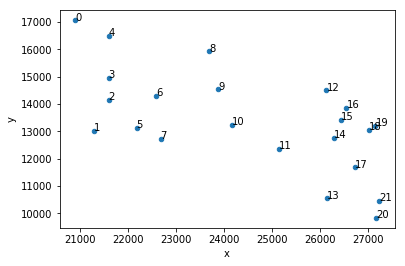

In [249]:
import pandas as pd
# import matplotlib.pyplot as plt
df = pd.DataFrame({"x": x, "y": y})
ax = df.plot.scatter("x", "y");

for i, txt in enumerate(range(n)):
    ax.annotate(i, (x[i], y[i]))

In [250]:
from itertools import combinations
from math import sqrt

costs = []
in_edges = []
out_edges = []

for i, j in combinations(range(n), 2):
    in_edges.append(i)
    out_edges.append(j)
    distance = sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
    costs.append(distance)

df = pd.DataFrame({"source": in_edges, "target": out_edges, "cost": costs})
assert len(df) == n*(n-1)/2
distances = {(in_, out): cost for in_, out, cost in zip(in_edges, out_edges, costs)}
distances.update({(out, in_): cost for in_, out, cost in zip(in_edges, out_edges, costs)})
df.head()

,source,target,cost
0,0,1,4069.705149
1,0,2,2999.490730
2,0,3,2213.594362
3,0,4,900.617093
4,0,5,4137.397249


## Dynamic programming algorithm

In [251]:
%%time 

from itertools import chain, combinations
import numpy as np

def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))


subsets = list(powerset(range(n)))[1:]
subsets_to_idx = {s: i for i, s in enumerate(subsets)}
n_subsets = len(subsets)

A = np.full([n_subsets, n], 1e6)
A[0, 0] = 0.

CPU times: user 2.64 s, sys: 620 ms, total: 3.26 s
Wall time: 3.27 s


In [252]:
import time

t0 = time.time()
for m in range(2, n+1):
    print(f"m={m} after {time.time()-t0:.1f}s")
    relevant_subsets = [(0,) + s for s in list(combinations(range(1, n), m-1))]
    relevant_subsets_indices = list(map(subsets_to_idx.__getitem__, relevant_subsets))
    for i in relevant_subsets_indices: 
        subset = subsets[i]
        for j in subset[1:]:
            subset_without_j = tuple(v for v in subset if v != j)
            subset_without_j_idx = subsets_to_idx[subset_without_j]
            
            values = []
            for k in subset_without_j:
                distance = distances[(j, k)]
                values.append(A[subset_without_j_idx, k] + distance)
            A[i, j] = min(values)
last_vertex = A[-1, :].argmin()
total_cost = A[-1, last_vertex] + distances[(0, last_vertex)]

print(f"Finished after {time.time()-t0:.1f}s")

print(f"Total cost optimal tour: {int(total_cost)}")

m=2 after 0.0s
m=3 after 0.0s
m=4 after 0.0s
m=5 after 0.1s
m=6 after 0.6s
m=7 after 1.1s
m=8 after 3.0s
m=9 after 8.0s
m=10 after 18.5s
m=11 after 37.7s
m=12 after 65.6s
m=13 after 98.8s
m=14 after 131.1s
m=15 after 156.9s
m=16 after 173.8s
m=17 after 183.5s
m=18 after 187.5s
m=19 after 188.8s
m=20 after 189.1s
m=21 after 189.1s
m=22 after 189.1s
Finished after 189.2s
Total cost optimal tour: 32227


In [257]:
print(f"Total cost optimal tour: {float(total_cost)}")

Total cost optimal tour: 32227.145086517092


In [258]:
32227.145086517092 + 4165.444877631655

36392.58996414875